In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [315]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [316]:
pd.set_option("display.max_columns", None)

# Data Loading

In [317]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/first_scenario.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [318]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [319]:
data_initial.head()

,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,1,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0,2011-01-31,NaN,NaN,NaN,NaN,0,0,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,1,2011-02-01,NaN,NaN,NaN,NaN,1,1,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0,2011-02-02,NaN,NaN,NaN,NaN,1,0,1,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


## Event Conversion

In [320]:
from sklearn.preprocessing import OneHotEncoder

In [321]:
hot_encoder=OneHotEncoder()

In [322]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [323]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [324]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [325]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [326]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

In [327]:
frames=[data_initial, event_df]
data=pd.concat(frames, axis=1)

In [328]:
data.drop(["event_type_1", "nan"], axis=1, inplace=True)

In [329]:
data.head()

,Sales,date,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting
0,0,2011-01-29,0,0,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,1,2011-01-30,0,0,0,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0,2011-01-31,0,0,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,1,2011-02-01,1,1,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0,2011-02-02,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [330]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting
count,"1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000","1,913.00000000"
mean,0.45791950,0.32932567,0.32932567,0.32932567,2.47000000,0.14270779,0.14270779,0.14323053,0.14323053,0.14270779,0.14270779,0.14270779,0.08259279,0.08886566,0.09722948,0.09095661,0.08102457,0.07841087,0.08102457,0.08102457,0.07841087,0.08102457,0.07841087,0.08102457,0.17616309,0.19132253,0.19079979,0.19079979,0.19079979,0.06011500,0.01829587,0.02665970,0.02718244,0.00836383
std,1.16989399,0.47009126,0.47009126,0.47009126,0.00000000,0.34986606,0.34986606,0.35039938,0.35039938,0.34986606,0.34986606,0.34986606,0.27533770,0.28462414,0.29634746,0.28762259,0.27294419,0.26888734,0.27294419,0.27294419,0.26888734,0.27294419,0.26888734,0.27294419,0.38105848,0.39344522,0.39303433,0.39303433,0.39303433,0.23776194,0.13405419,0.16112892,0.16265725,0.09109451
min,0.00000000,0.00000000,0.00000000,0.00000000,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
50%,0.00000000,0.00000000,0.00000000,0.00000000,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
75%,0.00000000,1.00000000,1.00000000,1.00000000,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
max,18.00000000,1.00000000,1.00000000,1.00000000,2.47000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000,1.00000000


# Performance Function

In [331]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

### Train & Test

In [332]:
train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [333]:
test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [334]:
train=train.drop(["date"], axis=1)
test=test.drop(["date"], axis=1)

In [335]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [336]:
from sklearn.model_selection import GridSearchCV

In [337]:
from sklearn.linear_model import ElasticNet

### Grid

In [338]:
elastic_net_model = ElasticNet()

In [339]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [340]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [341]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [342]:
elastic_predictions=elastic_net.predict(X_test)

In [343]:
performance_list("Control", elastic_net.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1530,0.40326797,0.15051780,-0.00000000,0.13284754,1.43577992,0.02875932,0.59819300,1.48336352


In [344]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [345]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,383,0.39715006,0.05053898,-0.70273224,-0.72269659,1.98640416,0.06302658,0.77751823,1.95774422


# Support Vector Machines

### Grid

In [346]:
elastic_net_model = ElasticNet()

In [347]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [348]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [349]:
from sklearn.svm import LinearSVR

In [350]:
sv_regressor=LinearSVR()

### Grid

In [351]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [352]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [353]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [354]:
from sklearn.svm import SVR

### Grid

In [355]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [356]:
sv_regressor_poly=SVR(kernel="poly")

In [357]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [358]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [359]:
sv_regressor_poly.best_estimator_

SVR(degree=2, epsilon=0.2, kernel='poly')

### Predictions

In [360]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [361]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [362]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [363]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [364]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1530,0.49999813,0.00002578,0.19346103,0.19346082,1.37516663,0.02963964,0.68758113,1.37516741


In [365]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1530,0.19399401,0.10490106,-1.07876511,-0.55436880,2.12299625,0.02916900,0.47775010,2.46270544


### Results

In [366]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,383,0.49601472,0.00609453,-0.36334705,-0.36343958,1.62714715,0.06202277,0.80701817,1.62700446


In [367]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,383,0.21466760,0.07878318,-2.15017359,-2.44693991,3.71064748,0.06570840,0.72656030,3.38458292


# Random Forest

In [368]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [369]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [370]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [371]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [372]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 12, 'n_estimators': 500}

### Results

In [373]:
rf_predictions=grid_search.predict(X_test)

In [374]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [375]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,383,0.42240434,0.30156468,-0.60093103,-2.02295753,3.29234567,0.06435194,0.76752930,1.81704884


In [376]:
performance_list("Control", grid_search.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,1530,0.40593646,0.80934674,0.00657365,nan,nan,0.01473899,0.26788174,0.65991052


# Feature Extraction

In [377]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [378]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [379]:
on_leaf = estimator.apply(X_train)

In [380]:
X_train_ext=X_train[:]

In [381]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [382]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node
0,0,0,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20
1,0,0,0,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20
2,0,0,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20
3,1,1,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20
4,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1,1,1,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
1526,1,0,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
1527,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,5
1528,1,1,1,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5


### Test Node Selection

In [383]:
on_leaf_test = estimator.apply(X_test)

In [384]:
X_test_ext=X_test[:]

In [385]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [386]:
X_test_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node
0,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
1,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
2,1,0,0,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
3,0,1,1,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,5
4,0,1,1,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,0,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
379,0,0,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
380,0,0,0,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5
381,0,0,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [387]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [388]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [389]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [390]:
train_new=concated_df.iloc[:len(X_train)]

In [391]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [392]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [393]:
elastic_net_model_new = ElasticNet()

In [394]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [395]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [396]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [397]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [398]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [399]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,383,0.44537793,0.23536878,-0.51835140,-0.58023210,1.84613347,0.06142316,0.76624213,1.72043130


### SVM

#### Linear

In [400]:
sv_regressor_new=LinearSVR()

### Grid

In [401]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [402]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [403]:
sv_regressor_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [404]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,383,0.49600814,0.00608786,-0.36336515,-0.36346357,1.62717114,0.06202288,0.80701844,1.62702661


## Poly

### Grid

In [405]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [406]:
sv_regressor_poly_new=SVR(kernel="poly")

In [407]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [408]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [409]:
sv_regressor_poly_new.best_estimator_

SVR(degree=2, epsilon=0.2, kernel='poly')

In [410]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,383,0.23262075,0.13498190,-1.90705027,-2.17809145,3.44304093,0.06480675,0.71922590,3.09183897


### Random Forest

In [411]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [412]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 200}

In [413]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,383,0.42962652,0.29266113,-0.57401876,-1.15902919,2.43470238,0.06341072,0.76363575,1.77744090


# General Result Table

In [414]:
pd.options.display.float_format = '{:,.8f}'.format

In [415]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [416]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,383,0.39715006,0.05053898,-0.70273224,-0.72269659,1.98640416,0.06302658,0.77751823,1.95774422
1,Support Vector Regressor Linear Performance,383,0.49601472,0.00609453,-0.36334705,-0.36343958,1.62714715,0.06202277,0.80701817,1.62700446
2,Support Vector Regressor Polynomial Performance,383,0.21466760,0.07878318,-2.15017359,-2.44693991,3.71064748,0.06570840,0.72656030,3.38458292
3,Random Forest Performance,383,0.42240434,0.30156468,-0.60093103,-2.02295753,3.29234567,0.06435194,0.76752930,1.81704884
4,Elastic Net Performance with Feature Extraction,383,0.44537793,0.23536878,-0.51835140,-0.58023210,1.84613347,0.06142316,0.76624213,1.72043130
5,SVR Linear Performance with Feature Extraction,383,0.49600814,0.00608786,-0.36336515,-0.36346357,1.62717114,0.06202288,0.80701844,1.62702661
6,SVR Polynomail Performance with Feature Extrac...,383,0.23262075,0.13498190,-1.90705027,-2.17809145,3.44304093,0.06480675,0.71922590,3.09183897
7,Random Forest Performance with Feature Extraction,383,0.42962652,0.29266113,-0.57401876,-1.15902919,2.43470238,0.06341072,0.76363575,1.77744090


## RFOverfitting

In [417]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,1530,0.40593646,0.80934674,0.00657365,nan,nan,0.01473899,0.26788174,0.65991052


In [418]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,383,0.42240434,0.30156468,-0.60093103,-2.02295753,3.29234567,0.06435194,0.76752930,1.81704884


In [419]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,1508,0.39605185,0.79034092,0.00710960,nan,nan,0.01255657,0.23087254,0.58293515


In [420]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,383,0.42962652,0.29266113,-0.57401876,-1.15902919,2.43470238,0.06341072,0.76363575,1.77744090


# Feature Control

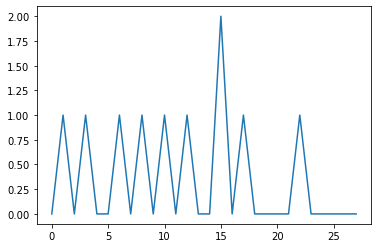

In [421]:
plt.plot(data.Sales[:28])

In [422]:
from statsmodels.graphics.tsaplots import plot_acf

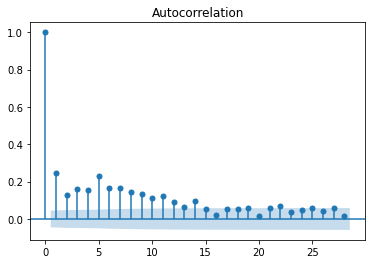

In [423]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [424]:
concated_df.Node.value_counts()

5     693
12    304
20    245
32    242
8      63
6      60
33     31
13     31
21     31
9      30
38     21
26     21
41     21
15     20
23     20
35     20
16     10
24     10
27     10
36     10
39     10
42     10
Name: Node, dtype: int64

In [425]:
concated_df[concated_df["Node"]==6].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node,Sales,new_feature
581,1,1,0,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,2,nan
582,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,0,2.00000000
583,1,1,1,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,6,0,0.00000000
584,1,0,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,0,0.00000000
585,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,1,0.00000000


In [426]:
concated_df[concated_df["Node"]==9].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node,Sales,new_feature
398,1,0,1,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,9,0,nan
399,1,1,1,2.47000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,9,0,0.00000000
401,1,1,1,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,9,0,0.00000000
402,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,9,0,0.00000000
404,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,9,0,0.00000000


In [427]:
concated_df[concated_df["Node"]==42].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,Junr,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,Node,Sales,new_feature
1402,1,1,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,42,1,nan
1403,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,42,3,1.00000000
1404,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,42,1,3.00000000
1405,1,0,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,42,0,1.00000000
1406,1,1,1,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,42,0,0.00000000


# General Function

In [432]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    
    train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    test.reset_index(drop=True, inplace=True)

    ### Date and Customer Drop

    train=train.drop(["date"], axis=1)
    test=test.drop(["date"], axis=1)

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[200,300,500], "max_features":[8,12,16],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [433]:
res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [434]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,383,0.45411788,0.24872318,-0.48912922,-0.55849691,1.82472959,0.06134972,0.76673097,1.68839634
0,SVR Linear Performance Lag 1,383,0.49601895,0.00609104,-0.36333543,-0.36343395,1.62714152,0.06202280,0.80702148,1.62699727
0,SVR Polynomial Performance Lag 1,383,0.23639296,0.17173947,-1.86066134,-2.74385238,4.01067454,0.06494945,0.72353336,3.06072294
0,Random Forest Performance Lag 1,383,0.42896626,0.27294801,-0.57644148,-1.28233607,2.55599274,0.06334113,0.76167922,1.77561567


In [431]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,383,0.39715006,0.05053898,-0.70273224,-0.72269659,1.98640416,0.06302658,0.77751823,1.95774422
1,Support Vector Regressor Linear Performance,383,0.49601472,0.00609453,-0.36334705,-0.36343958,1.62714715,0.06202277,0.80701817,1.62700446
2,Support Vector Regressor Polynomial Performance,383,0.21466760,0.07878318,-2.15017359,-2.44693991,3.71064748,0.06570840,0.72656030,3.38458292
3,Random Forest Performance,383,0.42240434,0.30156468,-0.60093103,-2.02295753,3.29234567,0.06435194,0.76752930,1.81704884
4,Elastic Net Performance with Feature Extraction,383,0.44537793,0.23536878,-0.51835140,-0.58023210,1.84613347,0.06142316,0.76624213,1.72043130
5,SVR Linear Performance with Feature Extraction,383,0.49600814,0.00608786,-0.36336515,-0.36346357,1.62717114,0.06202288,0.80701844,1.62702661
6,SVR Polynomail Performance with Feature Extrac...,383,0.23262075,0.13498190,-1.90705027,-2.17809145,3.44304093,0.06480675,0.71922590,3.09183897
7,Random Forest Performance with Feature Extraction,383,0.42962652,0.29266113,-0.57401876,-1.15902919,2.43470238,0.06341072,0.76363575,1.77744090
